In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib
import pandas as pd



In [2]:
df = pd.read_csv("../Data/Data.csv")

In [3]:
df = df.drop(["Unnamed: 0"],axis=1)

In [4]:
print(df.head().to_string())

   num_characters  num_words  num_sentences  avg_sentence_length  num_capitalized_words  num_exclamations  num_questions  has_clickbait_words  readability_score  sentiment_polarity  sentiment_subjectivity  class  PROPN       ADV   VERB       DET     CCONJ   PRON    ADP   PART   NOUN    ADJ       NUM     SCONJ       AUX
0        0.055838   0.055107       0.076720             0.119048               0.006329          0.045113       0.095745                  0.0           0.936917            0.541066                0.599895      0  0.200  0.180180  0.120  0.201201  0.197605  0.222  0.073  0.155  0.158  0.078  0.023952  0.081081  0.125333
1        0.036627   0.037962       0.037037             0.164048               0.009494          0.000000       0.000000                  0.0           0.929556            0.497498                0.334098      0  0.197  0.096096  0.097  0.282282  0.155689  0.096  0.129  0.080  0.184  0.090  0.059880  0.130631  0.128000
2        0.069430   0.065271       0.

In [5]:
X = df.drop("class", axis=1) 
y = df["class"]                


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Accuracy: 0.9282850779510022
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      4733
           1       0.93      0.91      0.92      4247

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



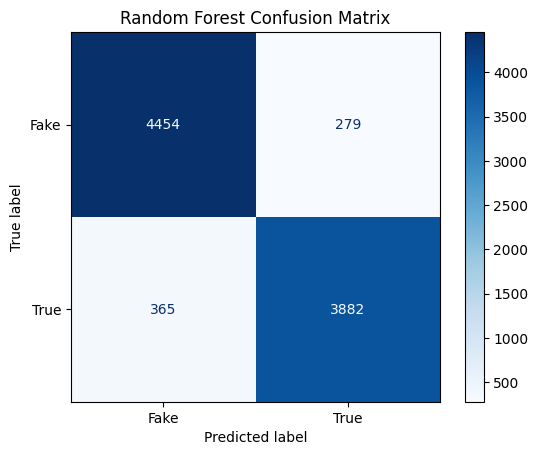

Random Forest ROC AUC: 0.9781


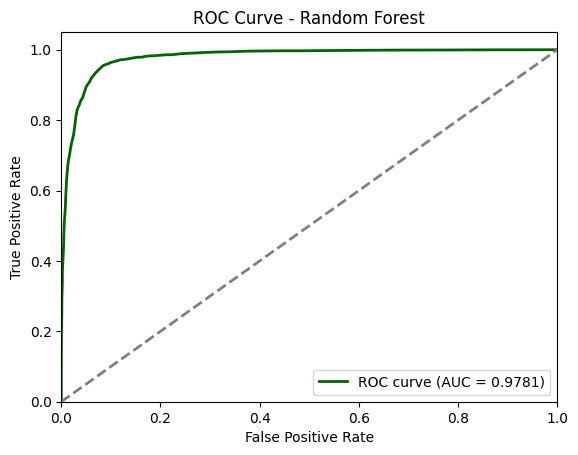

Random Forest EER: 0.0687 at threshold 0.4600


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]  # Probability of class '1'

disp = ConfusionMatrixDisplay.from_estimator(
    rf, X_test, y_test, display_labels=['Fake', 'True'], cmap=plt.cm.Blues
)
plt.title('Random Forest Confusion Matrix')
plt.savefig('ConMat_RF.png', dpi=300, bbox_inches='tight')
plt.show()

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
print(f'Random Forest ROC AUC: {roc_auc_rf:.4f}')

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.savefig('ROC_RF.png', dpi=300, bbox_inches='tight')
plt.show()

fnr_rf = 1 - tpr_rf
eer_threshold_rf = thresholds_rf[np.nanargmin(np.abs(fnr_rf - fpr_rf))]
eer_rf = fpr_rf[np.nanargmin(np.abs(fnr_rf - fpr_rf))]
print(f'Random Forest EER: {eer_rf:.4f} at threshold {eer_threshold_rf:.4f}')


d:\Projects\Fake_News_Detector\env\lib\site-packages\xgboost\training.py:183: UserWarning: [23:42:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9203786191536748
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      4733
           1       0.91      0.92      0.92      4247

    accuracy                           0.92      8980
   macro avg       0.92      0.92      0.92      8980
weighted avg       0.92      0.92      0.92      8980



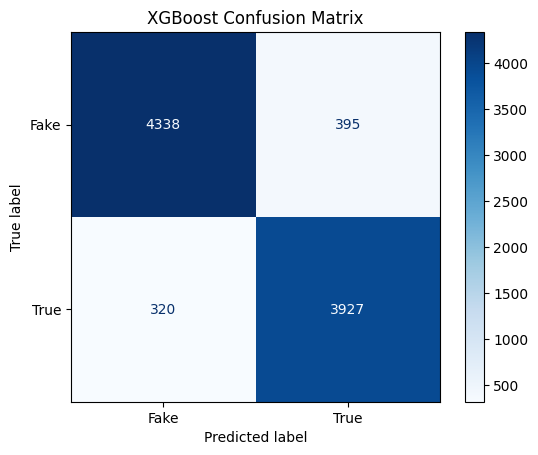

XGBoost ROC AUC: 0.9728


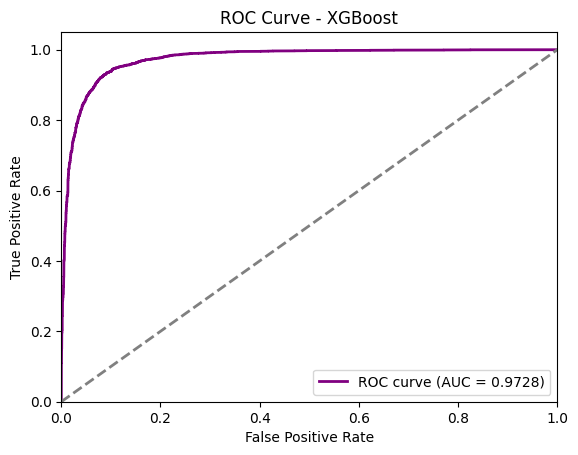

XGBoost EER: 0.0788 at threshold 0.5203


In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predictions (labels)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Predictions (probabilities)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
    xgb, X_test, y_test, display_labels=['Fake', 'True'], cmap=plt.cm.Blues
)
plt.title('XGBoost Confusion Matrix')
plt.savefig('ConMat_XGB.png', dpi=300, bbox_inches='tight')
plt.show()

# ROC curve and AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
print(f'XGBoost ROC AUC: {roc_auc_xgb:.4f}')

plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.savefig('ROC_XGB.png', dpi=300, bbox_inches='tight')
plt.show()

# EER calculation
fnr_xgb = 1 - tpr_xgb
eer_threshold_xgb = thresholds_xgb[np.nanargmin(np.abs(fnr_xgb - fpr_xgb))]
eer_xgb = fpr_xgb[np.nanargmin(np.abs(fnr_xgb - fpr_xgb))]
print(f'XGBoost EER: {eer_xgb:.4f} at threshold {eer_threshold_xgb:.4f}')


d:\Projects\Fake_News_Detector\env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Projects\Fake_News_Detector\env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1435, in _execute_child

[LightGBM] [Info] Number of positive: 17170, number of negative: 18748
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005826 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3851
[LightGBM] [Info] Number of data points in the train set: 35918, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.478033 -> initscore=-0.087923
[LightGBM] [Info] Start training from score -0.087923
LightGBM Accuracy: 0.9057906458797328
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4733
           1       0.89      0.91      0.90      4247

    accuracy                           0.91      8980
   macro avg       0.91      0.91      0.91      8980
weighted avg       0.91      0.91      0.91      8980



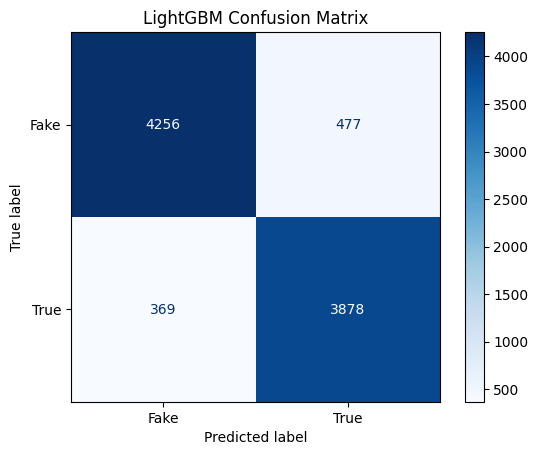

LightGBM ROC AUC: 0.9682


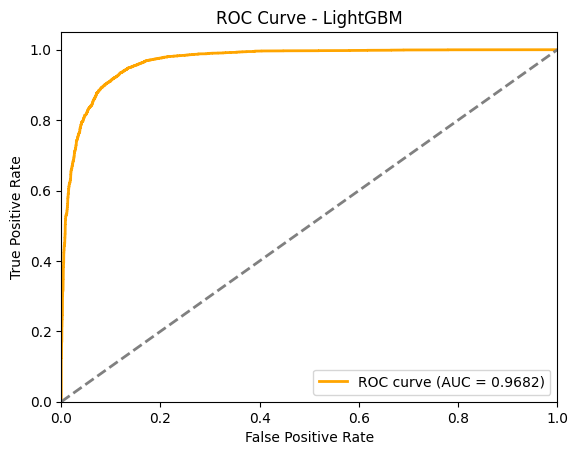

LightGBM EER: 0.0936 at threshold 0.5243


In [9]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Train LightGBM
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train, y_train)

# Predictions (labels)
y_pred_lgb = lgb.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))

# Predictions (probabilities)
y_pred_prob_lgb = lgb.predict_proba(X_test)[:, 1]

# Confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
    lgb, X_test, y_test, display_labels=['Fake', 'True'], cmap=plt.cm.Blues
)
plt.title('LightGBM Confusion Matrix')
plt.savefig('ConMat_LGBM.png', dpi=300, bbox_inches='tight')
plt.show()

# ROC curve and AUC
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(y_test, y_pred_prob_lgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)
print(f'LightGBM ROC AUC: {roc_auc_lgb:.4f}')

plt.figure()
plt.plot(fpr_lgb, tpr_lgb, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc_lgb:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend(loc='lower right')
plt.savefig('ROC_LGBM.png', dpi=300, bbox_inches='tight')
plt.show()

# EER calculation
fnr_lgb = 1 - tpr_lgb
eer_threshold_lgb = thresholds_lgb[np.nanargmin(np.abs(fnr_lgb - fpr_lgb))]
eer_lgb = fpr_lgb[np.nanargmin(np.abs(fnr_lgb - fpr_lgb))]
print(f'LightGBM EER: {eer_lgb:.4f} at threshold {eer_threshold_lgb:.4f}')


CatBoost Accuracy: 0.9165924276169265
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      4733
           1       0.90      0.93      0.91      4247

    accuracy                           0.92      8980
   macro avg       0.92      0.92      0.92      8980
weighted avg       0.92      0.92      0.92      8980



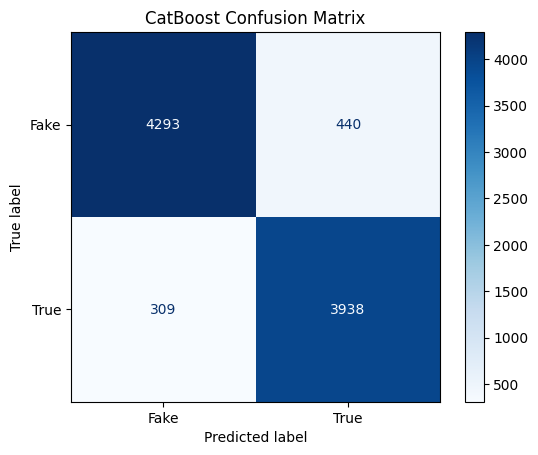

CatBoost ROC AUC: 0.9733


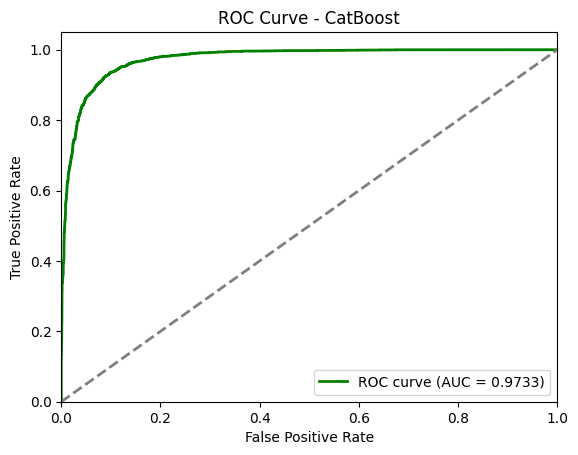

CatBoost EER: 0.0841 at threshold 0.5446


In [10]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Train CatBoost
cat = CatBoostClassifier(verbose=0, random_state=42)
cat.fit(X_train, y_train)

# Predictions (labels)
y_pred_cat = cat.predict(X_test)
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

# Predictions (probabilities)
y_pred_prob_cat = cat.predict_proba(X_test)[:, 1]

# Confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
    cat, X_test, y_test, display_labels=['Fake', 'True'], cmap=plt.cm.Blues
)
plt.title('CatBoost Confusion Matrix')
plt.savefig('ConMat_CatBoost.png', dpi=300, bbox_inches='tight')
plt.show()

# ROC curve and AUC
fpr_cat, tpr_cat, thresholds_cat = roc_curve(y_test, y_pred_prob_cat)
roc_auc_cat = auc(fpr_cat, tpr_cat)
print(f'CatBoost ROC AUC: {roc_auc_cat:.4f}')

plt.figure()
plt.plot(fpr_cat, tpr_cat, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_cat:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoost')
plt.legend(loc='lower right')
plt.savefig('ROC_CatBoost.png', dpi=300, bbox_inches='tight')
plt.show()

# EER calculation
fnr_cat = 1 - tpr_cat
eer_threshold_cat = thresholds_cat[np.nanargmin(np.abs(fnr_cat - fpr_cat))]
eer_cat = fpr_cat[np.nanargmin(np.abs(fnr_cat - fpr_cat))]
print(f'CatBoost EER: {eer_cat:.4f} at threshold {eer_threshold_cat:.4f}')


Logistic Regression Accuracy: 0.8326280623608018
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      4733
           1       0.80      0.85      0.83      4247

    accuracy                           0.83      8980
   macro avg       0.83      0.83      0.83      8980
weighted avg       0.83      0.83      0.83      8980



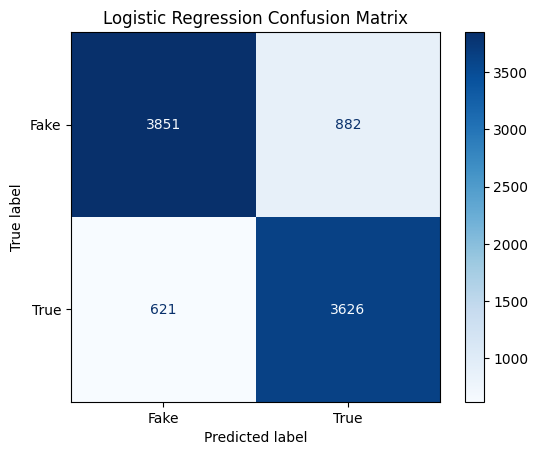

Logistic Regression ROC AUC: 0.9026


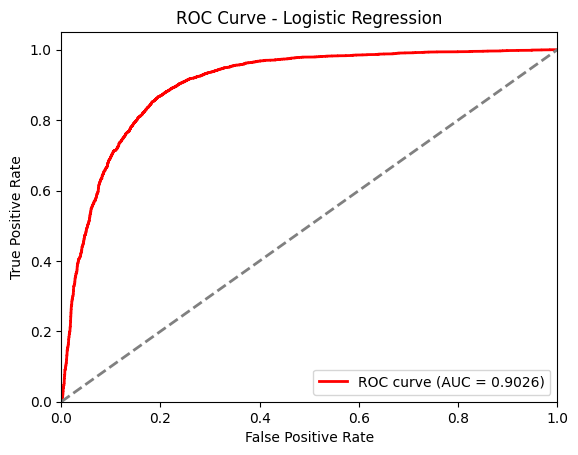

Logistic Regression EER: 0.1705 at threshold 0.5338


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Predictions (labels)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Predictions (probabilities)
y_pred_prob_lr = lr.predict_proba(X_test)[:, 1]

# Confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
    lr, X_test, y_test, display_labels=['Fake', 'True'], cmap=plt.cm.Blues
)
plt.title('Logistic Regression Confusion Matrix')
plt.savefig('ConMat_LogReg.png', dpi=300, bbox_inches='tight')
plt.show()

# ROC curve and AUC
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
print(f'Logistic Regression ROC AUC: {roc_auc_lr:.4f}')

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc_lr:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.savefig('ROC_LogReg.png', dpi=300, bbox_inches='tight')
plt.show()

# EER calculation
fnr_lr = 1 - tpr_lr
eer_threshold_lr = thresholds_lr[np.nanargmin(np.abs(fnr_lr - fpr_lr))]
eer_lr = fpr_lr[np.nanargmin(np.abs(fnr_lr - fpr_lr))]
print(f'Logistic Regression EER: {eer_lr:.4f} at threshold {eer_threshold_lr:.4f}')


SVM Accuracy: 0.8561247216035635
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      4733
           1       0.82      0.88      0.85      4247

    accuracy                           0.86      8980
   macro avg       0.86      0.86      0.86      8980
weighted avg       0.86      0.86      0.86      8980



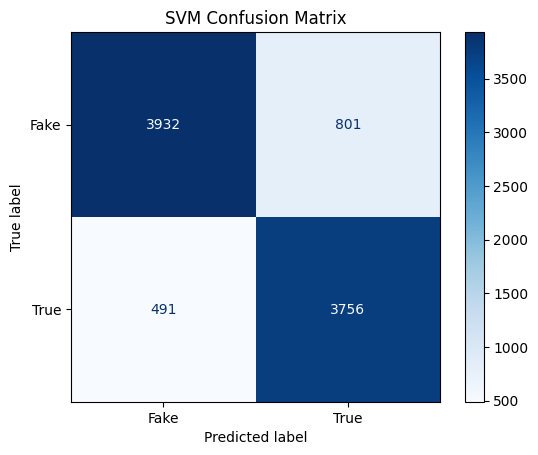

SVM ROC AUC: 0.9279


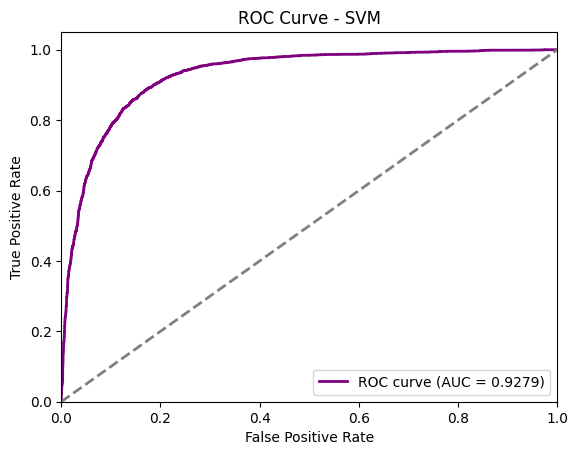

SVM EER: 0.1435 at threshold 0.5359


In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Train SVM
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predictions (labels)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Predictions (probabilities)
y_pred_prob_svm = svm.predict_proba(X_test)[:, 1]

# Confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
    svm, X_test, y_test, display_labels=['Fake', 'True'], cmap=plt.cm.Blues
)
plt.title('SVM Confusion Matrix')
plt.savefig('ConMat_SVM.png', dpi=300, bbox_inches='tight')
plt.show()

# ROC curve and AUC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
print(f'SVM ROC AUC: {roc_auc_svm:.4f}')

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.savefig('ROC_SVM.png', dpi=300, bbox_inches='tight')
plt.show()

# EER calculation
fnr_svm = 1 - tpr_svm
eer_threshold_svm = thresholds_svm[np.nanargmin(np.abs(fnr_svm - fpr_svm))]
eer_svm = fpr_svm[np.nanargmin(np.abs(fnr_svm - fpr_svm))]
print(f'SVM EER: {eer_svm:.4f} at threshold {eer_threshold_svm:.4f}')
